In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Assuming your data is loaded into a DataFrame
df = pd.read_csv('KepRiau 2015 - 2022.csv')
df

,datetime,total_visitor,total_accomodation
0,1/1/2014,164430,10055
1,2/1/2014,137055,10079
2,3/1/2014,167030,10132
3,4/1/2014,151982,10190
4,5/1/2014,154299,10274
...,...,...,...
103,8/1/2022,79470,15449
104,9/1/2022,104652,15502
105,10/1/2022,106160,15525
106,11/1/2022,103940,15612


c:\Users\atrke\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\atrke\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='total_visitor'>

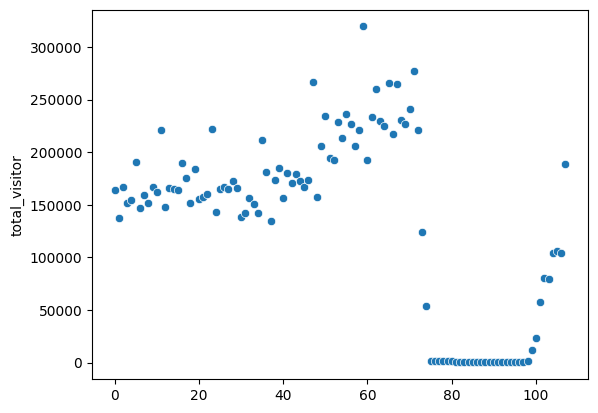

In [5]:
import seaborn as sns
sns.scatterplot(df['total_visitor'])

In [24]:
# Select relevant columns and convert them to numpy arrays
data = df[['total_visitor','total_accomodation']].values

In [25]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [26]:
# Choose the number of time steps (input sequence length)
n_steps = 12

# Create sequences for time series forecasting
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps, 0])  # total_accommodation
        y.append(data[i+n_steps, 1])    # total_visitor
    return np.array(X), np.array(y)

In [27]:
# Create sequences
X, y = create_sequences(data_scaled, n_steps)

In [28]:
# Reshape the input data for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

In [29]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [30]:
# Train the model
model.fit(X, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
3/3 [==============================] - 1s 5ms/step - loss: 0.2845
Epoch 2/50
3/3 [==============================] - 0s 6ms/step - loss: 0.2604
Epoch 3/50
3/3 [==============================] - 0s 5ms/step - loss: 0.2344
Epoch 4/50
3/3 [==============================] - 0s 6ms/step - loss: 0.2083
Epoch 5/50
3/3 [==============================] - 0s 4ms/step - loss: 0.1802
Epoch 6/50
3/3 [==============================] - 0s 5ms/step - loss: 0.1528
Epoch 7/50
3/3 [==============================] - 0s 7ms/step - loss: 0.1314
Epoch 8/50
3/3 [==============================] - 0s 5ms/step - loss: 0.1203
Epoch 9/50
3/3 [==============================] - 0s 15ms/step - loss: 0.1205
Epoch 10/50
3/3 [==============================] - 0s 6ms/step - loss: 0.1142
Epoch 11/50
3/3 [==============================] - 0s 6ms/step - loss: 0.1025
Epoch 12/50
3/3 [==============================] - 0s 2ms/step - loss: 0.0943
Epoch 13/50
3/3 [==============================] - 0s 5ms/step - loss: 0

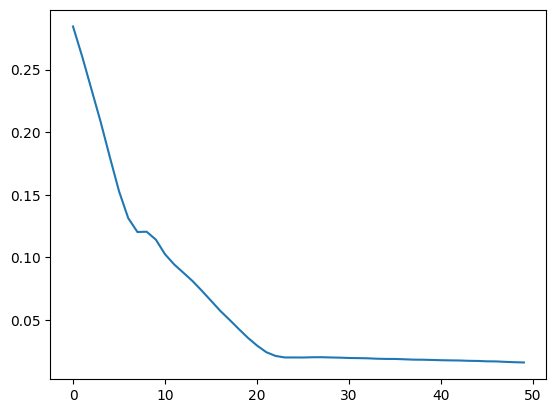

In [31]:
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [32]:
# Make predictions for the next 12 periods
forecast_data = data_scaled[-n_steps:, 0].reshape((1, n_steps, 1))
for _ in range(12):
    prediction = model.predict(forecast_data)
    forecast_data = np.append(forecast_data[:, 1:, :], prediction.reshape((1, 1, 1)), axis=1)

1/1 [==============================] - 0s 22ms/step


In [34]:
forecast_data

array([[[0.65083975],
        [0.59318167],
        [0.53216326],
        [0.47626677],
        [0.43333849],
        [0.40571362],
        [0.39538357],
        [0.39388531],
        [0.39642289],
        [0.40165275],
        [0.40644065],
        [0.41167876]]])

In [ ]:
true_forecast=scaler.inverse_transform(test_)

In [33]:
# Extract the scaled features without the last column (total_visitor)
scaled_features = data_scaled[:, :-1]

# Extract the forecasted values
forecast_values = forecast_data[0, :, 0]

# Reshape forecast_values to have the same number of dimensions as scaled_features
forecast_values = forecast_values.reshape(-1, 1)

# Concatenate along the last dimension
combined_data = np.concatenate((scaled_features, forecast_values), axis=-1)

# Inverse transform the combined data to get the original scale
forecasted_values = scaler.inverse_transform(combined_data)[:, -1]

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 108 and the array at index 1 has size 12